Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [3]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [ ]:
# first 5 rows in the dataframe
customer_data.head()

In [ ]:
# finding the number of rows and columns
customer_data.shape

In [ ]:
# getting some informations about the dataset
customer_data.info()

In [ ]:
# checking for missing values
customer_data.isnull().sum()

Choosing the Annual Income Column & Spending Score column

In [8]:
X = customer_data.iloc[:,[3,4]].values

In [35]:
print(X[:,0])

[ 15  15  16  16  17  17  18  18  19  19  19  19  20  20  20  20  21  21
  23  23  24  24  25  25  28  28  28  28  29  29  30  30  33  33  33  33
  34  34  37  37  38  38  39  39  39  39  40  40  40  40  42  42  43  43
  43  43  44  44  46  46  46  46  47  47  48  48  48  48  48  48  49  49
  50  50  54  54  54  54  54  54  54  54  54  54  54  54  57  57  58  58
  59  59  60  60  60  60  60  60  61  61  62  62  62  62  62  62  63  63
  63  63  63  63  64  64  65  65  65  65  67  67  67  67  69  69  70  70
  71  71  71  71  71  71  72  72  73  73  73  73  74  74  75  75  76  76
  77  77  77  77  78  78  78  78  78  78  78  78  78  78  78  78  79  79
  81  81  85  85  86  86  87  87  87  87  87  87  88  88  88  88  93  93
  97  97  98  98  99  99 101 101 103 103 103 103 113 113 120 120 126 126
 137 137]


<Axes: >

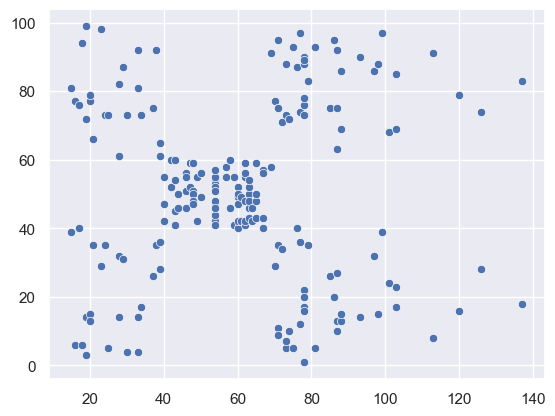

In [36]:
sns.scatterplot(x=X[:,0],y=X[:,1])

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)

In [ ]:
Y = kmeans.fit_predict(X)
Y

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [40]:
# finding wcss value for different number of clusters
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

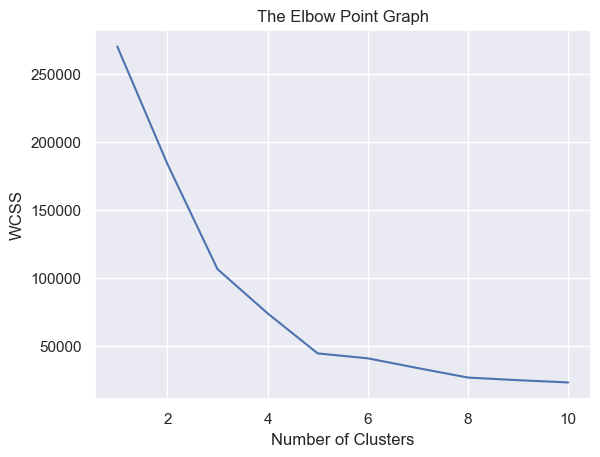

In [41]:
# plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [42]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [38]:
kmeans.fit(X)


KMeans(n_clusters=5, random_state=0)

In [ ]:
X[0]

array([15, 39], dtype=int64)

In [43]:
data =pd.DataFrame([[23,10]])

In [44]:
kmeans.predict(data)

array([3])

5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

<!-- 
# Numpy array of all the cluster labels assigned to each data point 
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 1, min_samples = 3).fit(X) 
labels = db_default.labels_ 
labels -->

In [48]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

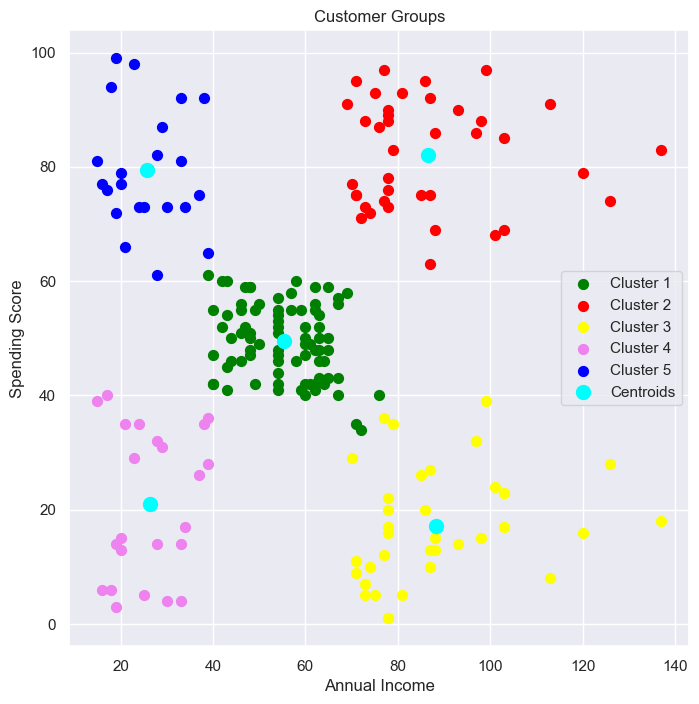

In [45]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1') ## modrate customer
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')  ## premium customer
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')  ## medium customer
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')  ## high income low spending customer
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')  ## low income low spending customer

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


In [19]:
# Load the trained K-Means model
import pickle
with open("kmeans_model.pkl", "wb") as file:
    kmeans = pickle.dump(kmeans, file)

In [ ]:
# logistic_regression_model predictions
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the trained regression model
with open("kmeans_model.pkl", "rb") as file:
    model = pickle.load(file)

st.title("Customer segment analysis")
st.write("Enter the required details of Customer.")

# Input fields for user
income = st.number_input("Income", min_value=0)
Annual_Income  = st.number_input("Spending Score ", min_value=0)

# gender = st.selectbox("gender (eg. 0 for male 1 for female)", [0, 1])

# Predict button
if st.button("Customer Segment Predict "):
    # Create a DataFrame with user input
    input_data = pd.DataFrame(
        [[income, Annual_Income]],
        columns=["Income",""]
    )
    
    # Predict loan amount
    customer_segment = model.predict(input_data)[0]
    
    if customer_segment==0:
        st.success(f"Hurry you are Eligible for Loan Amount: {customer_segment}")
    elif customer_segment==1:
        st.success(f"Hurry you are Eligible for Loan Amount: {customer_segment}")
    elif customer_segment==2:
        st.success(f"Hurry you are Eligible for Loan Amount: {customer_segment}")
    elif customer_segment==3:
        st.success(f"Hurry you are Eligible for Loan Amount: {customer_segment}")

    else:
        st.success(f"OH! No: No Eligible for Loan: {customer_segment}")

#  streamlit -m run streamlit_loan.py

2025-07-16 13:16:39.687 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:16:44.643 
  command:

    streamlit run C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-16 13:16:44.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:16:44.653 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:16:44.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:16:44.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:16:44.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:16:44.672 Thread 